In [67]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exercise 01 Matplotlib


In [ ]:
# Load the CSV file
csv_path = os.path.join(os.getcwd(), '..', '..','classification_results_trial_0001.csv')
df = pd.read_csv(csv_path, sep=',')

df.head()

,image_path,real_class,predicted_class,prob_benign,prob_malign
0,image_001.jpg,malign,malign,0.031429,0.968571
1,image_002.jpg,benign,benign,0.636410,0.363590
2,image_003.jpg,malign,malign,0.314356,0.685644
3,image_004.jpg,benign,benign,0.508571,0.491429
4,image_005.jpg,benign,benign,0.907566,0.092434


### 1. Crie um gráfico de barras mostrando a contagem de imagens para real_class (quantas "benigno" e "maligno" são na realidade).

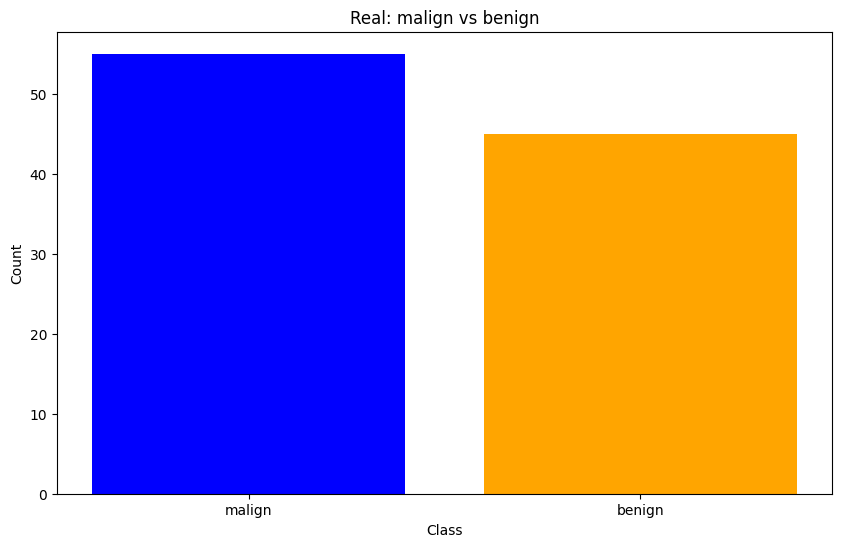

In [35]:

# Count the occurrences of each class in 'real_class'
plt.figure(figsize=(10, 6))
plt.bar(df['real_class'].value_counts().index,  df['real_class'].value_counts().values, color=['blue' ,'orange'])
plt.title("Real: malign vs benign")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


### 2. Crie outro gráfico de barras mostrando a contagem de imagens para predicted_class (quantas "benigno" e "maligno" o modelo previu).

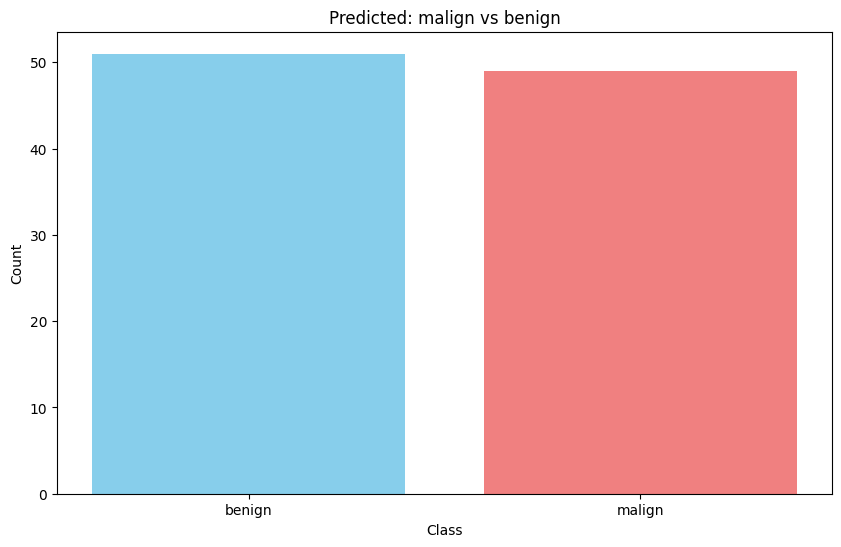

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(df['predicted_class'].value_counts().index,  df['predicted_class'].value_counts().values, color=['skyblue' ,'lightcoral'])
plt.title("Predicted: malign vs benign")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

### 3. Crie um histograma para a coluna prob_benign (probabilidade de ser "benigno")

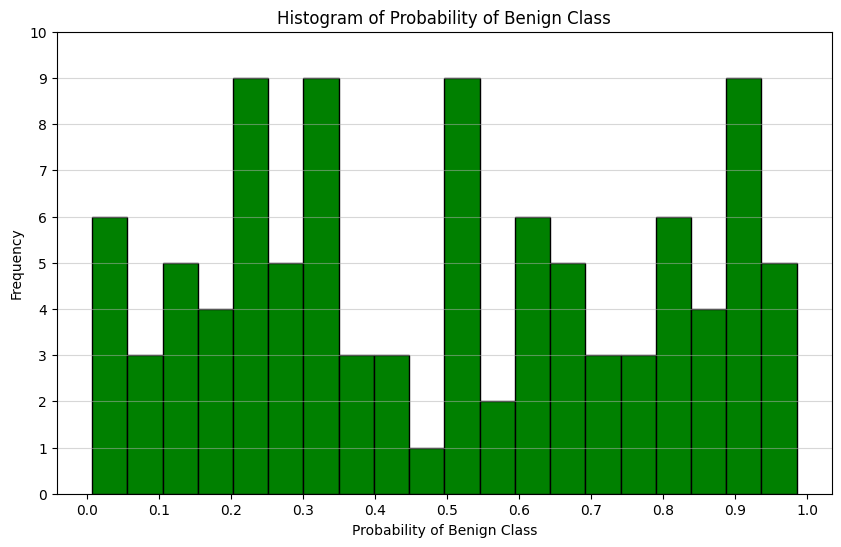

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['prob_benign'], bins=20, color='green', edgecolor='black')
plt.title("Histogram of Probability of Benign Class")
plt.xlabel("Probability of Benign Class")
plt.xlabel("Probability of Benign Class")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.5)

max_y = plt.gca().get_ylim()[1]

plt.yticks(np.arange(0, max_y+1, step=1))

plt.show()

### 4. Crie um histograma para a coluna prob_malign (probabilidade de ser "maligno")

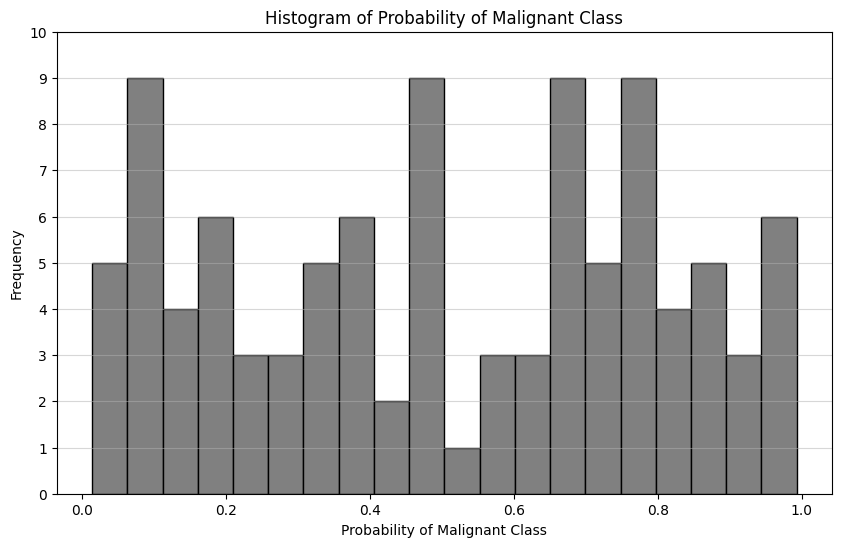

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['prob_malign'], bins=20, color='grey', edgecolor='black')
plt.title("Histogram of Probability of Malignant Class")
plt.xlabel("Probability of Malignant Class")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.5)
max_y = plt.gca().get_ylim()[1] # Get the maximum y value for setting y-ticks
plt.yticks(np.arange(0, max_y+1, step=1)) # Set y-ticks to integers
plt.show()

### 5. Crie um gráfico de dispersão (scatter plot) onde o eixo X pode ser prob_benign e o eixo Y pode ser prob_malign. Pinte os pontos de forma diferente com base se o modelo acertou ou errou a predição da imagem. Isso pode ajudar a visualizar se os erros ocorrem em regiões de menor confiança (probabilidades próximas de 0.5).

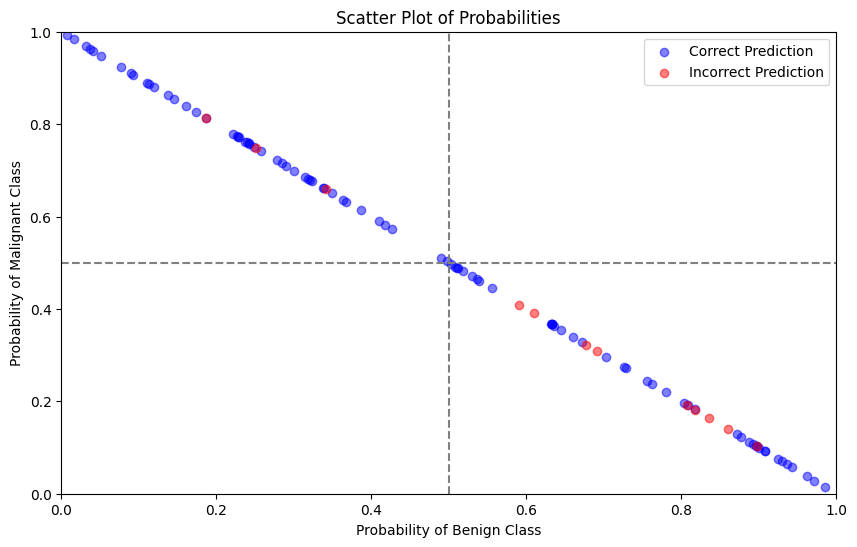

In [ ]:
acertos = df['real_class'] == df['predicted_class']
erros = df['real_class'] != df['predicted_class']


plt.figure(figsize=(10, 6))
plt.scatter(df.loc[acertos,'prob_benign'], df.loc[acertos,'prob_malign'], c='Blue', alpha=0.5, label = 'Correct Prediction' )
plt.scatter(df.loc[erros, 'prob_benign'], df.loc[erros, 'prob_malign'], c='Red', alpha=0.5, label = 'Incorrect Prediction' )
plt.title("Scatter Plot of Probabilities")
plt.xlabel("Probability of Benign Class")
plt.ylabel("Probability of Malignant Class")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.axvline(x=0.5, color='grey', linestyle='--')
plt.legend()
plt.show()

### 6.Qual tipo de erro é mais comum (Falso Positivo ou Falso Negativo)? Crie um gráfico que ajude a visualizar isso. Dada a natureza dos dados médicos, qual tipo de erro seria mais preocupante e por quê?

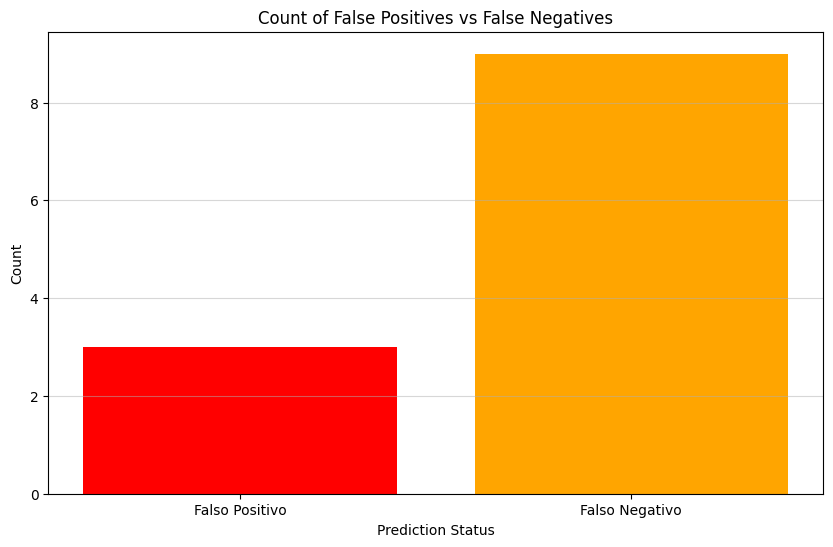

In [117]:

falso_positivos = len(df[(df['real_class'] == 'benign') & (df['predicted_class'] == 'malign')])
falso_negativos = len(df[(df['real_class'] == 'malign') & (df['predicted_class'] == 'benign')])
plt.figure(figsize=(10, 6))
plt.bar(['Falso Positivo', 'Falso Negativo'], [falso_positivos, falso_negativos], color=['red', 'orange'])
plt.title("Count of False Positives vs False Negatives")
plt.xlabel("Prediction Status")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.5)
plt.show()